<a href="https://colab.research.google.com/github/Ilef-Mhamdi/Happiness-over-the-years-exploratory-analysis-of-happiness-scores-of-different-countries/blob/main/Final_project_for_Data_Science_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***World Happiness Final Project***

**Installing the packages**


In [ ]:

!pip install kagglehub pycountry_convert --quiet

import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry_convert as pc

**Download dataset**

In [ ]:

path = kagglehub.dataset_download("unsdsn/world-happiness")
print("Dataset files path:", path)
# Files available (2015-2019)
available_years = [2015, 2016, 2017, 2018, 2019]

# Defining  and unifying consistent columns that I wanna keep across years (different years have different column names, so I mapped them)
column_mappings = {
    2015: {
        'Country': 'Country',
        'Happiness Rank': 'Happiness_Rank',
        'Happiness Score': 'Happiness_Score',
        'Economy (GDP per Capita)': 'GDP_per_Capita',
        'Family': 'Social_Support',
        'Health (Life Expectancy)': 'Healthy_Life_Expectancy',
        'Freedom': 'Freedom',
        'Generosity': 'Generosity',
        'Trust (Government Corruption)': 'Perceptions_of_Corruption'
    },
    2016: {
        'Country': 'Country',
        'Happiness Rank': 'Happiness_Rank',
        'Happiness Score': 'Happiness_Score',
        'Economy (GDP per Capita)': 'GDP_per_Capita',
        'Family': 'Social_Support',
        'Health (Life Expectancy)': 'Healthy_Life_Expectancy',
        'Freedom': 'Freedom',
        'Generosity': 'Generosity',
        'Trust (Government Corruption)': 'Perceptions_of_Corruption'
    },
    2017: {
        'Country': 'Country',
        'Happiness.Rank': 'Happiness_Rank',
        'Happiness.Score': 'Happiness_Score',
        'Economy..GDP.per.Capita.': 'GDP_per_Capita',
        'Family': 'Social_Support',
        'Health..Life.Expectancy.': 'Healthy_Life_Expectancy',
        'Freedom': 'Freedom',
        'Generosity': 'Generosity',
        'Trust..Government.Corruption.': 'Perceptions_of_Corruption'
    },
    2018: {
        'Country or region': 'Country',
        'Overall rank': 'Happiness_Rank',
        'Score': 'Happiness_Score',
        'GDP per capita': 'GDP_per_Capita',
        'Social support': 'Social_Support',
        'Healthy life expectancy': 'Healthy_Life_Expectancy',
        'Freedom to make life choices': 'Freedom',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Perceptions_of_Corruption'
    },
    2019: {
        'Country or region': 'Country',
        'Overall rank': 'Happiness_Rank',
        'Score': 'Happiness_Score',
        'GDP per capita': 'GDP_per_Capita',
        'Social support': 'Social_Support',
        'Healthy life expectancy': 'Healthy_Life_Expectancy',
        'Freedom to make life choices': 'Freedom',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Perceptions_of_Corruption'
    }
}


Dataset files path: /kaggle/input/world-happiness


**Loading and unifying datasets**

In [ ]:
dfs = []
for year in available_years:
    fname = f"{year}.csv"
    fpath = os.path.join(path, fname)
    if os.path.exists(fpath):
        df_year = pd.read_csv(fpath)
        # Renaming columns according to mapping for the year
        df_year = df_year.rename(columns=column_mappings[year])
        # to keep only the columns that I want (some years may have extra columns)
        cols_to_keep = list(column_mappings[year].values())
        df_year = df_year[cols_to_keep]
        df_year['Year'] = year
        dfs.append(df_year)
    else:
        print(f"File not found: {fpath}")

# Concatenating all years
df = pd.concat(dfs, ignore_index=True)

**Data cleaning and ensuring consistency (handling also the missing values)**

In [ ]:
# Showing the shape and sample after combination of the database
print(f"Combined dataset shape: {df.shape}")
print(df.head())

# Striping whitespace from country names for the cleaning of the data process
df['Country'] = df['Country'].str.strip()

# Converting Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Droping rows missing Happiness_Score (target)
df = df.dropna(subset=['Happiness_Score'])

# Imputing the missing values in features with median per year
features = ['GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
for col in features:
    if col in df.columns:
        df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(x.median()))

Combined dataset shape: (782, 10)
       Country  Happiness_Rank  Happiness_Score  GDP_per_Capita  \
0  Switzerland               1            7.587         1.39651   
1      Iceland               2            7.561         1.30232   
2      Denmark               3            7.527         1.32548   
3       Norway               4            7.522         1.45900   
4       Canada               5            7.427         1.32629   

   Social_Support  Healthy_Life_Expectancy  Freedom  Generosity  \
0         1.34951                  0.94143  0.66557     0.29678   
1         1.40223                  0.94784  0.62877     0.43630   
2         1.36058                  0.87464  0.64938     0.34139   
3         1.33095                  0.88521  0.66973     0.34699   
4         1.32261                  0.90563  0.63297     0.45811   

   Perceptions_of_Corruption  Year  
0                    0.41978  2015  
1                    0.14145  2015  
2                    0.48357  2015  
3           

**Creating Geographic Region feature**

In [ ]:
def country_to_continent(country):
    try:
        code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Other'

df['Region'] = df['Country'].apply(country_to_continent)

**Descriptive statistics**

In [ ]:
desc_stats = df[['Happiness_Score'] + features].agg(['mean', 'median', 'std'])
print(desc_stats)

        Happiness_Score  GDP_per_Capita  Social_Support  \
mean           5.379018        0.916047        1.078392   
median         5.322000        0.982205        1.124735   
std            1.127456        0.407340        0.329548   

        Healthy_Life_Expectancy   Freedom  Generosity  \
mean                   0.612416  0.411091    0.218576   
median                 0.647310  0.431000    0.201982   
std                    0.248309  0.152880    0.122321   

        Perceptions_of_Corruption  
mean                     0.125380  
median                   0.090905  
std                      0.105760  


**Visualizations**

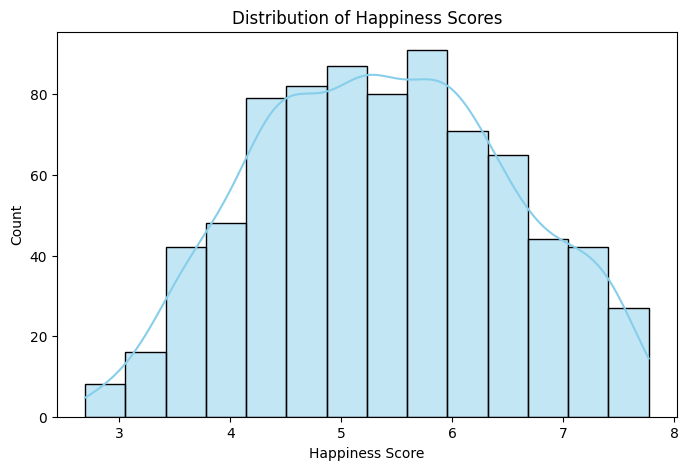

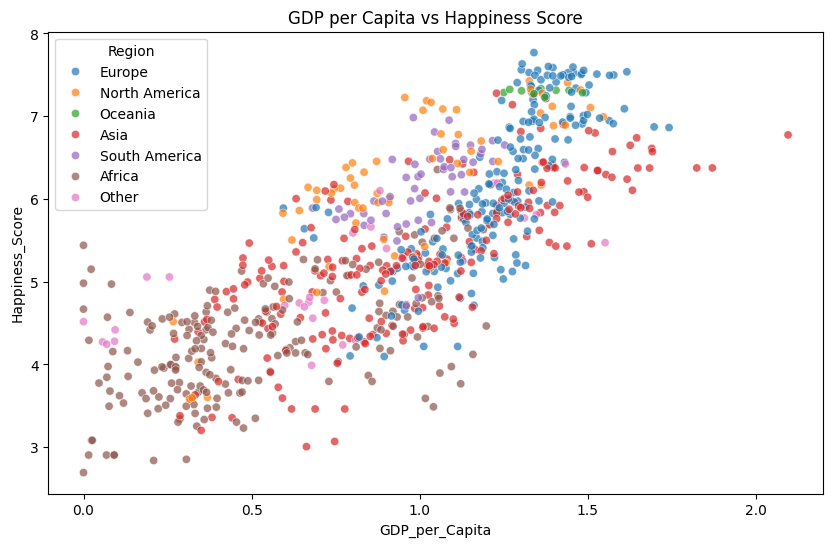

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(8,5))
sns.histplot(df['Happiness_Score'], kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP_per_Capita', y='Happiness_Score', hue='Region', alpha=0.7)
plt.title('GDP per Capita vs Happiness Score')
plt.show()


**Correlation heatmap**

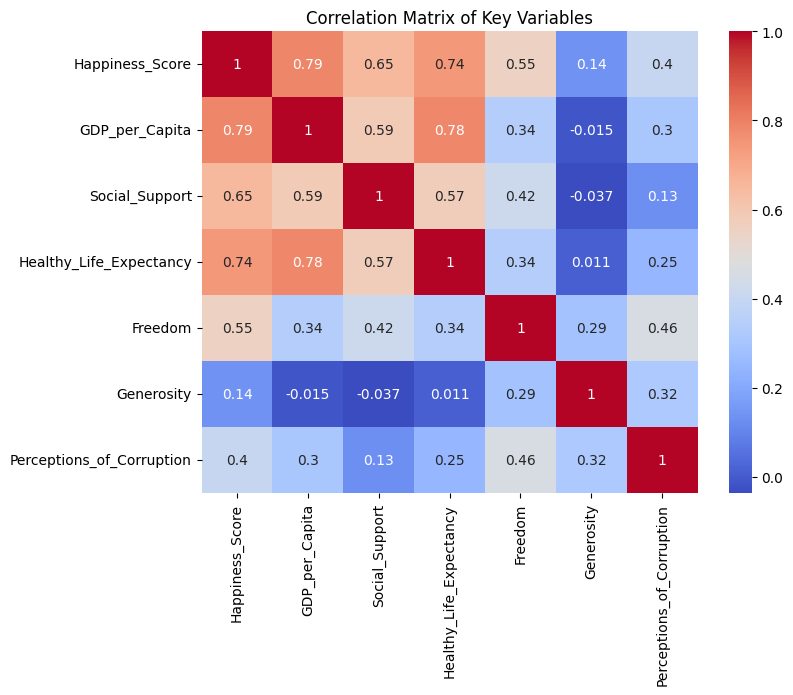

In [ ]:
corr = df[['Happiness_Score'] + features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

**Boxplot of Happiness Score by Region**

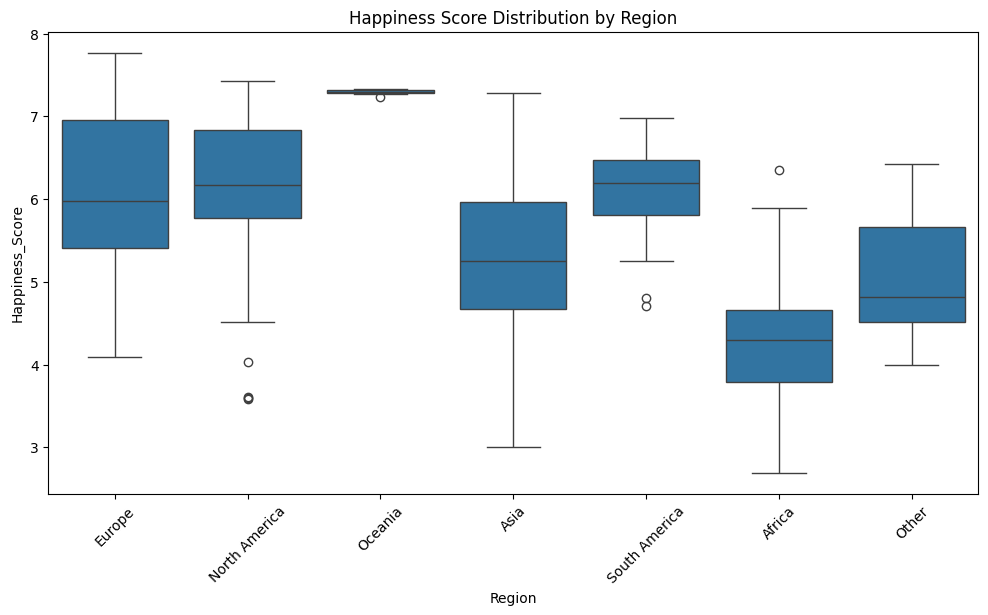

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Region', y='Happiness_Score', data=df)
plt.title('Happiness Score Distribution by Region')
plt.xticks(rotation=45)
plt.show()


**World Map of Average Happiness Scores by Country (2015–2019)**

In [ ]:
# Map Visualization of Average Happiness Scores by Country
fig = px.choropleth(df.groupby('Country')['Happiness_Score'].mean().reset_index(),
                    locations="Country",
                    locationmode='country names',
                    color="Happiness_Score",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Happiness Scores by Country (2015-2019 Average)")
fig.show()


**Line Plot of Average Happiness Score Over Time by Region**

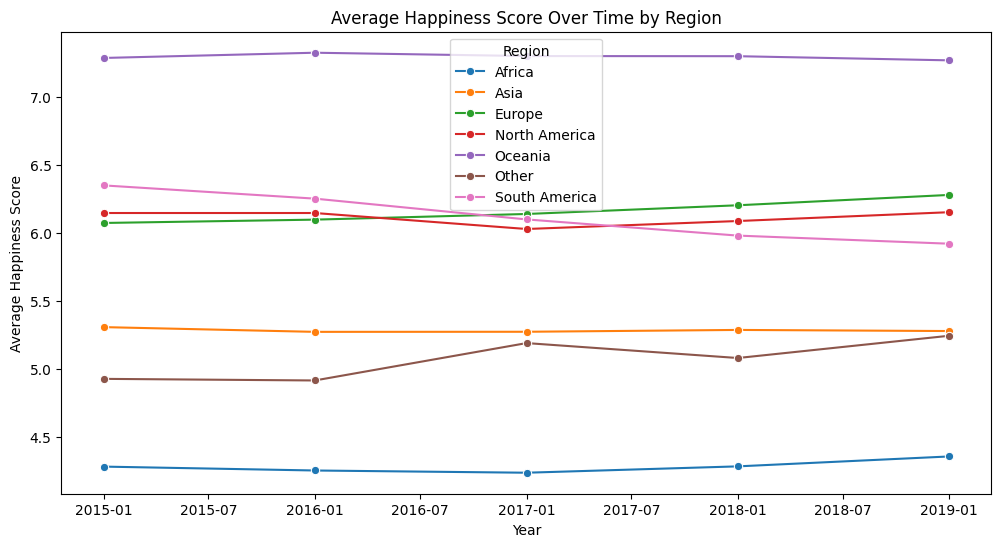

In [ ]:
df_region_year = df.groupby(['Region', 'Year'])['Happiness_Score'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_region_year, x='Year', y='Happiness_Score', hue='Region', marker='o')
plt.title('Average Happiness Score Over Time by Region')
plt.ylabel('Average Happiness Score')
plt.show()
